<a href="https://colab.research.google.com/github/DavidCevallos15/Cumplea-os/blob/main/Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minería de Datos - Agrupamiento con K-Medoides**
*Universidad Técnica de Manabí*  
*Facultad de Ciencias Informáticas*  
*Dr. Jorge Párraga Álava*

---

# **Agrupamiento con k-means y jerárquico** 💻

- La red de comunidades rurales EcoRutas Andinas, dedicada al turismo sostenible en zonas montañosas de Ecuador, desea mejorar su estrategia de servicios personalizando las experiencias que ofrecen a los visitantes. Para ello, han recolectado datos de los turistas que han participado en sus rutas durante el último año.

- Se solicita aplicar técnicas de agrupamiento no supervisado, específicamente el algoritmo K-Medoides, con el fin de segmentar a los visitantes en grupos con intereses, comportamientos y perfiles similares. Esta segmentación permitirá adecuar las rutas, los paquetes turísticos y los mensajes promocionales a cada tipo de visitante.

- El conjunto de datos se puede descargar aquí 👉 enlace al dataset. En este archivo, contiene 100 registros, cada uno correspondiente a un visitante distinto, y posee las siguientes variables:

- ingresos_mensuales: ingreso promedio mensual del visitante (en USD).
gasto_tecnologia: monto aproximado mensual que invierte en dispositivos digitales o apps para viajes.
- nivel_digital: nivel de familiaridad digital (0 a 100), útil para definir la adopción de apps o experiencias inmersivas.
- frecuencia_compra: número promedio de compras o contrataciones de paquetes turísticos en el último año.

🛠️ **Instrucciones**

1.  **Cargar y exploración de datos:**
Importar el dataset desde Google Drive.
Visualizar la estructura y realizar un análisis preliminar de las variables.

2. **Limpieza de datos:**
Detectar y tratar valores duplicados.
Tratar valores nulos (si los hay).
Detectar y analizar posibles outliers.

3. **Transformación de datos:**
Normalizar las variables numéricas utilizando la técnica de z-score.
4. **Cálculo de distancias:** Generar una matriz de distancias euclidianas entre los registros.

5. **Modelado:**
Aplicar el algoritmo K-Medoides con diferentes valores de k (por ejemplo, k=2, 3, 4, 5).
Evaluar la calidad de los agrupamientos utilizando el coeficiente de silueta.
Determinar el valor óptimo de k y generar el modelo final.
6. **Visualización de resultados:**
Visualizar los clusters en 2D mediante PCA o scatter plots.
Mostrar los medoides y la separación entre grupos si es posible.
7. **Caracterización de clusters:**
Calcular la media y desviación estándar de cada variable por grupo.
Redactar un resumen interpretativo del perfil de cada grupo de visitantes.


## **1. Cargar y exploración de datos:**

 - Importar el dataset desde Google Drive.
 - Visualizar la estructura y realizar un análisis preliminar de las variables.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Ruta al archivo en tu Google Drive
ruta = '/content/drive/My Drive/Minería de datos/Fin de ciclo/Agrupamiento/ecorutas.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataframe
df.head()


,ingresos_mensuales,gasto_tecnologia,nivel_digital,frecuencia_compra
0,8248.357077,911.092259,95.972252,11.643805
1,7930.867849,784.900642,93.844753,10.174094
2,8323.844269,937.569802,92.969234,9.401985
3,8761.514928,839.936131,96.835029,10.183522
4,7882.923313,870.830625,98.092999,6.024862


In [3]:
# Dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Estadísticas descriptivas
print("\nResumen estadístico:")
print(df.describe())

# Valores únicos por columna
print("\nValores únicos por columna:")
print(df.nunique())


Dimensiones del dataset: (100, 4)

Tipos de datos:
ingresos_mensuales    float64
gasto_tecnologia      float64
nivel_digital         float64
frecuencia_compra     float64
dtype: object

Resumen estadístico:
       ingresos_mensuales  gasto_tecnologia  nivel_digital  frecuencia_compra
count          100.000000        100.000000     100.000000         100.000000
mean          5063.075159        486.128108      55.640825           6.270759
std           2259.259984        315.221052      31.299735           2.873273
min           1253.093923         -1.257129      -1.206337           1.047912
25%           3094.549023        190.658348      29.254874           3.704251
50%           5357.745663        511.502152      59.579584           5.818266
75%           7066.905179        759.208671      83.974512           8.946225
max           8789.606408       1085.227818      99.693931          12.955788

Valores únicos por columna:
ingresos_mensuales    100
gasto_tecnologia      100
nivel_digi

# **2. Limpieza de Datos**
* Detectar y tratar valores duplicados.
* Tratar valores nulos (si los hay).
* Detectar y analizar posibles outliers.

In [4]:
# Verificar si hay filas duplicadas
duplicados = df.duplicated()
print("¿Hay filas duplicadas?", duplicados.any())
print("Número de filas duplicadas:", duplicados.sum())

# Eliminar duplicados si existen
df = df.drop_duplicates()


¿Hay filas duplicadas? False
Número de filas duplicadas: 0


In [5]:
# Verificar valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos (opcional)
df = df.dropna()


Valores nulos por columna:
ingresos_mensuales    0
gasto_tecnologia      0
nivel_digital         0
frecuencia_compra     0
dtype: int64


# **Detección de outliers (usando boxplots y z-score)**

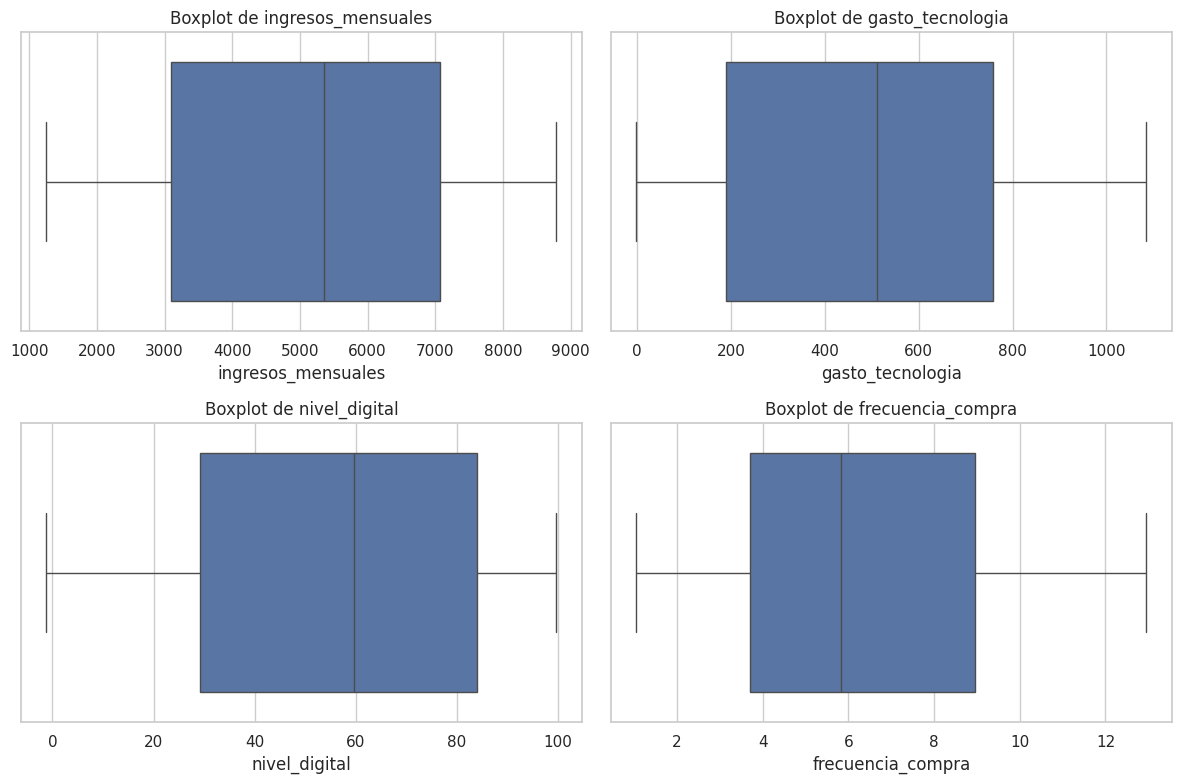

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo
sns.set(style="whitegrid")
columnas_numericas = ['ingresos_mensuales', 'gasto_tecnologia', 'nivel_digital', 'frecuencia_compra']

# Graficar boxplots para cada variable numérica
plt.figure(figsize=(12, 8))
for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


# **3. Transformación de datos (Normalización)**
* Normalizar las variables numéricas utilizando la técnica de z-score.
* **Cálculo de distancias**: Generar una matriz de distancias euclidianas entre los registros.

In [9]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas
columnas_numericas = ['ingresos_mensuales', 'gasto_tecnologia', 'nivel_digital', 'frecuencia_compra']

# Inicializamos el escalador
scaler = StandardScaler()

# Aplicamos la transformación
df_normalizado = scaler.fit_transform(df[columnas_numericas])

# Convertimos a DataFrame para mantener estructura
df_norm = pd.DataFrame(df_normalizado, columns=columnas_numericas)

# Vista previa
df_norm.head()


,ingresos_mensuales,gasto_tecnologia,nivel_digital,frecuencia_compra
0,1.416981,1.354938,1.295046,1.879429
1,1.275745,0.952594,1.226732,1.365341
2,1.450562,1.439358,1.198619,1.095267
3,1.645261,1.128067,1.322750,1.368639
4,1.254417,1.226570,1.363144,-0.086012


In [10]:
from scipy.spatial.distance import pdist, squareform

# Calcular distancias euclidianas y convertir a matriz cuadrada
distancias = squareform(pdist(df_norm, metric='euclidean'))

# Mostrar dimensiones de la matriz
print("Dimensiones de la matriz de distancias:", distancias.shape)


Dimensiones de la matriz de distancias: (100, 100)


# **4. Modelado**
* Aplicar el algoritmo K-Medoides con diferentes valores de k (por ejemplo, k=2, 3, 4, 5).
* Evaluar la calidad de los agrupamientos utilizando el coeficiente de silueta.
* Determinar el valor óptimo de k y generar el modelo final.

Instalar librería scikit-learn-extra

In [10]:
!pip install scikit-learn-extra


Aplicamos K-Medoides con diferentes valores de k

In [7]:
!pip install pyclustering


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=9b44899af13f0aa9c1346b84422b48c21062cd0982096c96e439569345e79691
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


In [11]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score
import numpy as np
import random

# Convertimos los datos normalizados a lista
data = df_norm.values.tolist()

# Calcular matriz de distancias
matriz_distancias = calculate_distance_matrix(data)

# Probar k = 2 a 5
siluetas = []

for k in range(2, 6):
    # Seleccionar k índices aleatorios como medoides iniciales
    medoids_iniciales = random.sample(range(len(data)), k)

    # Crear y entrenar modelo
    kmedoids_instance = kmedoids(data, medoids_iniciales, data_type='points')
    kmedoids_instance.process()

    # Obtener clusters
    clusters = kmedoids_instance.get_clusters()

    # Asignar etiquetas por índice
    etiquetas = np.zeros(len(data))
    for i, cluster in enumerate(clusters):
        for index in cluster:
            etiquetas[index] = i

    # Calcular silhouette
    sil_score = silhouette_score(df_norm, etiquetas)
    siluetas.append((k, sil_score))
    print(f'k={k} -> Silhouette Score = {sil_score:.4f}')


k=2 -> Silhouette Score = 0.6217
k=3 -> Silhouette Score = 0.5142
k=4 -> Silhouette Score = 0.5245
k=5 -> Silhouette Score = 0.4679


In [12]:
# Mejor valor de k
mejor_k = max(siluetas, key=lambda x: x[1])[0]
print(f"\nMejor número de clusters: {mejor_k}")



Mejor número de clusters: 2


# **Visualización de resultados**
* Visualizar los clusters en 2D mediante PCA o scatter plots.
* Mostrar los medoides y la separación entre grupos si es posible.

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_norm)

# Usamos nuevamente el mejor K y entrenamos modelo
from pyclustering.cluster.kmedoids import kmedoids

# Reinicializar medoides
medoids_iniciales = random.sample(range(len(data)), mejor_k)
kmedoids_final = kmedoids(data, medoids_iniciales, data_type='points')
kmedoids_final.process()

# Obtener clusters y etiquetas
clusters = kmedoids_final.get_clusters()
etiquetas = np.zeros(len(data))
for i, cluster in enumerate(clusters):
    for idx in cluster:
        etiquetas[idx] = i

# Convertimos a enteros
etiquetas = etiquetas.astype(int)


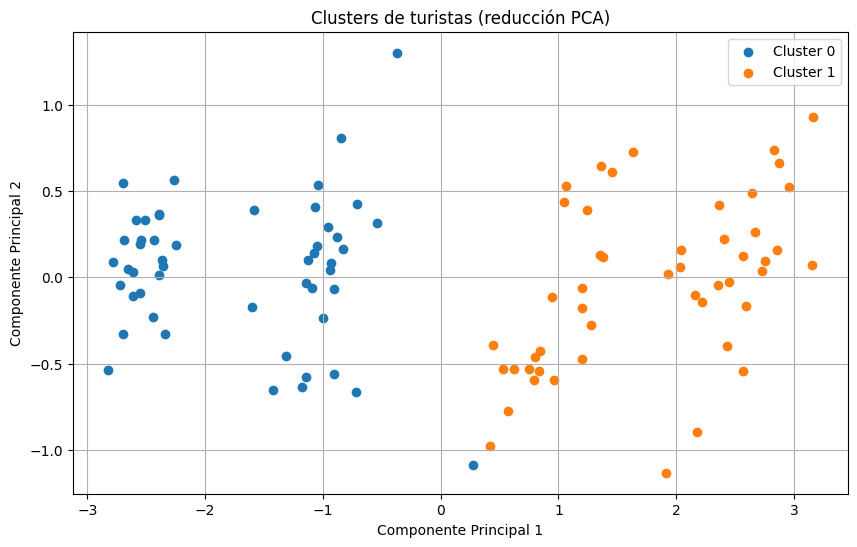

In [14]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
for i in range(mejor_k):
    plt.scatter(df_pca[etiquetas == i, 0], df_pca[etiquetas == i, 1], label=f'Cluster {i}')

plt.title('Clusters de turistas (reducción PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


# **Caracterización de clusters**
* Calcular la media y desviación estándar de cada variable por grupo.
* Redactar un resumen interpretativo del perfil de cada grupo de visitantes

Agregar¿mos la etiqueta del cluster al DataFrame original

In [15]:
df['cluster'] = etiquetas
df.head()


,ingresos_mensuales,gasto_tecnologia,nivel_digital,frecuencia_compra,cluster
0,8248.357077,911.092259,95.972252,11.643805,1
1,7930.867849,784.900642,93.844753,10.174094,1
2,8323.844269,937.569802,92.969234,9.401985,1
3,8761.514928,839.936131,96.835029,10.183522,1
4,7882.923313,870.830625,98.092999,6.024862,1


### **Calculamos estadísticos por clústeres**

In [16]:
# Agrupamos por cluster y calculamos la media
media_cluster = df.groupby('cluster')[['ingresos_mensuales', 'gasto_tecnologia', 'nivel_digital', 'frecuencia_compra']].mean().round(2)

# Desviación estándar por cluster
std_cluster = df.groupby('cluster')[['ingresos_mensuales', 'gasto_tecnologia', 'nivel_digital', 'frecuencia_compra']].std().round(2)

# Mostrar resultados
print("📊 Media por cluster:")
display(media_cluster)

print("\n📉 Desviación estándar por cluster:")
display(std_cluster)


📊 Media por cluster:


,ingresos_mensuales,gasto_tecnologia,nivel_digital,frecuencia_compra
cluster,,,,
0,3125.67,205.40,28.47,4.07
1,7079.55,778.31,83.92,8.56



📉 Desviación estándar por cluster:


,ingresos_mensuales,gasto_tecnologia,nivel_digital,frecuencia_compra
cluster,,,,
0,1155.53,133.07,15.99,1.50
1,998.81,124.95,12.37,2.05


Como resumen interpretativo del perfil de cada grupo de visitantes tenemos:

In [17]:
for i in range(mejor_k):
    print(f"\n🧭 Perfil del Cluster {i}")
    print(f"Ingresos mensuales promedio: ${media_cluster.loc[i, 'ingresos_mensuales']} ± {std_cluster.loc[i, 'ingresos_mensuales']}")
    print(f"Gasto en tecnología: ${media_cluster.loc[i, 'gasto_tecnologia']} ± {std_cluster.loc[i, 'gasto_tecnologia']}")
    print(f"Nivel digital: {media_cluster.loc[i, 'nivel_digital']} ± {std_cluster.loc[i, 'nivel_digital']}")
    print(f"Frecuencia de compra: {media_cluster.loc[i, 'frecuencia_compra']} ± {std_cluster.loc[i, 'frecuencia_compra']}")



🧭 Perfil del Cluster 0
Ingresos mensuales promedio: $3125.67 ± 1155.53
Gasto en tecnología: $205.4 ± 133.07
Nivel digital: 28.47 ± 15.99
Frecuencia de compra: 4.07 ± 1.5

🧭 Perfil del Cluster 1
Ingresos mensuales promedio: $7079.55 ± 998.81
Gasto en tecnología: $778.31 ± 124.95
Nivel digital: 83.92 ± 12.37
Frecuencia de compra: 8.56 ± 2.05
